# Cap.16 - **Fazendo download de dados**

Neste capítulo você fará **download de conjuntos de dados a partir de fontes online e criará visualizações funcionais desses dados. Uma grande variedade de dados pode ser encontrada online, e muitos desses ainda não foram analisados de forma completa.** A capacidade de analisar esses dados permite descobrir padrões e conexões que ninguém mais percebeu.

Vamos acessar e visualizar dados armazenados em dois formatos comuns: <code>**CSV e JSON**</code>. Usaremos o m**ódulo <code>csv</code> de Python para processar dados meteorológicos armazenados no <code>formato CSV (Comma-Separated Values, ou Valores Separados por Vírgula)</code> e analisar as temperaturas máxima e mínima ao longo do tempo em duas localidades diferentes.** Então usaremos o **<code>matplotlib</code> para gerar um gráfico com base nos dados baixados e exibiremos as variações de temperatura em dois ambientes bem distintos:** Sitka no Alasca e o Vale da Morte (Death Valley) na Califórnia. Mais adiante, neste capítulo, usaremos o **módulo <code>json</code> para acessar dados de população armazenados no <code>formato JSON</code> e usaremos o <code>Pygal</code> para desenhar um mapa da população de cada país.**

No final deste capítulo você estará preparado para trabalhar com diferentes tipos e formatos de conjuntos de dados e compreenderá melhor o processo de criação de visualizações complexas. **A capacidade de acessar e de visualizar dados online de tipos e formatos diferentes é essencial para trabalhar com uma grande variedade de conjuntos de dados do mundo real.**

## Formato de arquivo <code>**CSV**</code>

Uma maneira simples de armazenar dados em um <code>**arquivo-texto**</code> é escrevê-los como uma série de valores separados por **<code>vírgula (comma- separated values)</code>**. Os arquivos resultantes são chamados de **arquivos <code>CSV</code>**. Por exemplo, eis uma linha de dados meteorológicos no formato <code>**CSV**</code>:

**2014-1-5,61,44,26,18,7,-1,56,30,9,30.34,30.27,30.15,,,,10,4,,0.00,0,,195**

**São dados meteorológicos de 5 de janeiro de 2014 para Sitka no Alasca. Incluem as temperaturas máxima e mínima assim como várias outras medições desse dia.** Os **arquivos <code>CSV</code>** podem ser complicados para os seres humanos lerem, mas são fáceis para os programas processarem e extraírem valores, o que agiliza a operação de análise de dados.

Começaremos com um pequeno conjunto de dados meteorológicos formatados em <code>**CSV**</code>, registrados em **Sitka** e disponíveis nos recursos do livro em https://www.nostarch.com/pythoncrashcourse/. Copie o arquivo **sitka_weather_07-2014.csv** para a pasta em que você está escrevendo os programas deste capítulo. (Depois que fizer o download dos recursos do livro, você terá todos os arquivos necessários a este projeto.)   
**NOTA** Os dados meteorológicos deste projeto foram originalmente baixados de http://www.wunderground.com/history/.

### Fazendo <code>**parse**</code> dos cabeçalhos de arquivos <code>**CSV**</code>

**O módulo <code>csv</code> da biblioteca-padrão de Python faz parse das linhas de um arquivo <code>CSV</code> e permite extrair rapidamente os valores em que estivermos interessados.** Vamos começar analisando a primeira linha do arquivo, que contém uma série de cabeçalhos para os dados:

In [6]:
#highs_lows
import csv

filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)

['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']


Depois de importar o **módulo <code>csv</code>, armazenamos o nome do arquivo com que estamos trabalhando em <code>filename</code>. Então abrimos o arquivo e armazenamos o objeto arquivo resultante em <code>f</code>.** Em seguida, chamamos <code>**csv.reader()**</code> e lhe passamos o objeto arquivo como argumento a fim de criar um objeto reader associado a esse arquivo. Armazenamos o **objeto <code>reader em reader</code>**.

O **módulo <code>csv</code> contém uma função <code>next()</code>, que devolve a próxima linha do arquivo quando recebe o objeto <code>reader</code>.** Na listagem anterior, chamamos **<code>next()**</code> apenas uma vez para obter a primeira linha do arquivo, que contém os cabeçalhos. Armazenamos os dados devolvidos em <code>header_row</code>.** Como podemos ver, <code>**header_row**</code>contém cabeçalhos significativos relacionados a dados meteorológicos, que nos informam quais dados estão armazenados em cada linha.

**<code>reader</code> processa a primeira linha de valores separados por vírgula do arquivo e armazena cada um deles como um item em uma lista.** O cabeçalho <code>**AKDT**</code> representa <code>**Alaska Daylight Time (Fuso horário do Alasca)**</code>. **A posição desse cabeçalho nos informa que o primeiro valor de cada linha será a <code>data ou a hora</code>. O cabeçalho Max <code>TemperatureF</code> nos informa que o segundo valor de cada linha é a temperatura máxima dessa data em graus <code>Fahrenheit</code>.** Você pode ler o restante dos cabeçalhos para determinar quais tipos de informação estão incluídos no arquivo.

**NOTA**  
Os cabeçalhos nem sempre estão formatados de modo consistente: espaços e unidades estão em lugares inusitados. Isso é comum em arquivos com dados brutos, mas não causarão problemas.

### Exibindo os cabeçalhos e suas posições

Para facilitar a compreensão dos dados de cabeçalho do arquivo, exiba cada cabeçalho e a sua posição na lista:

In [5]:
#hihgs_lows
import csv

filename='sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    for index, column_header in enumerate(header_row):
        print(index, column_header)

0 AKDT
1 Max TemperatureF
2 Mean TemperatureF
3 Min TemperatureF
4 Max Dew PointF
5 MeanDew PointF
6 Min DewpointF
7 Max Humidity
8  Mean Humidity
9  Min Humidity
10  Max Sea Level PressureIn
11  Mean Sea Level PressureIn
12  Min Sea Level PressureIn
13  Max VisibilityMiles
14  Mean VisibilityMiles
15  Min VisibilityMiles
16  Max Wind SpeedMPH
17  Mean Wind SpeedMPH
18  Max Gust SpeedMPH
19 PrecipitationIn
20  CloudCover
21  Events
22  WindDirDegrees


Usamos **<code>enumerate()</code> a lista para obter o índice de cada item, assim como o valor. (Observe que removemos a linha <code>print(header_row)</code> em troca dessa versão mais detalhada.)** Eis a saída mostrando o índice de cada cabeçalho.

Nessa saída vemos que as datas e suas temperaturas máximas estão armazenadas nas colunas 0 e 1. **Para explorar esses dados, processaremos cada linha de <code>sitka_weather_07-2014.csv</code> e extrairemos os valores nos índices 0 e 1.**

### Extraindo e lendo dados

Agora que sabemos quais são as colunas de dados de que precisaremos, vamos ler alguns desses dados. **Em primeiro lugar, vamos ler a temperatura máxima de cada dia**:

In [31]:
#highs_lows.py 
import csv

# Obtém as temperaturas máximas do arquivo 
filename ='sitka_weather_07-2014.csv'
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader)

    highs = []
    for row in reader: 
        highs.append(row[1])
        
print(highs)

['64', '71', '64', '59', '69', '62', '61', '55', '57', '61', '57', '59', '57', '61', '64', '61', '59', '63', '60', '57', '69', '63', '62', '59', '57', '57', '61', '59', '61', '61', '66']


Criamos **uma <code>lista vazia</code>** chamada **<code>highs</code> e então percorremos as linhas restantes do arquivo com um laço. O objeto <code>reader</code> continua a partir de onde parou no arquivo CSV<code>CSV</code> e devolve automaticamente cada linha após a sua posição atual.** Como já lemos a linha com o <code>**cabeçalho**</code>, o laço começará na segunda linha, em que os dados propriamente ditos têm início. **A cada passagem pelo laço concatenamos os dados do <code>índice 1 – a segunda coluna – em highs</code>**.<code></code>


A listagem a seguir mostra os dados que estão agora armazenados em <code>**highs**</code>:    
**['64', '71', '64', '59', '69', '62', '61', '55', '57', '61', '57', '59', '57', '61', '64', '61', '59', '63', '60', '57', '69', '63', '62', '59', '57', '57', '61', '59', '61', '61', '66']**  

**Extraímos a 'temperatura máxima' de cada dia e as armazenamos de modo organizado em uma <code>lista na forma de strings</code>.**
Em seguida, converta essas **<code>strings em números</code> usando <code>int()</code> para que eles possam ser lidos pelo <code>matplotlib</code>**:

In [40]:
#highs_lows.py 
import csv

# Obtém as temperaturas máximas do arquivo 
filename ='sitka_weather_07-2014.csv'
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader)

    highs = []
    for row in reader: 
        high=int(row[1])
        highs.append(high)
        
print(highs)

[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57, 69, 63, 62, 59, 57, 57, 61, 59, 61, 61, 66]


**Convertemos as <code>strings em inteiros</code> e antes de concatenar as temperaturas na lista. O resultado é uma lista das máximas diárias em formato numérico.**    
Agora vamos criar uma visualização para esses dados.

### Plotando dados em um gráfico de temperatura

Para visualizar os dados de temperatura que temos, em primeiro lugar, vamos criar um **gráfico simples das temperaturas máximas diárias usando o <code>matplotlib</code>**, como vemos a seguir: 

[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57, 69, 63, 62, 59, 57, 57, 61, 59, 61, 61, 66]


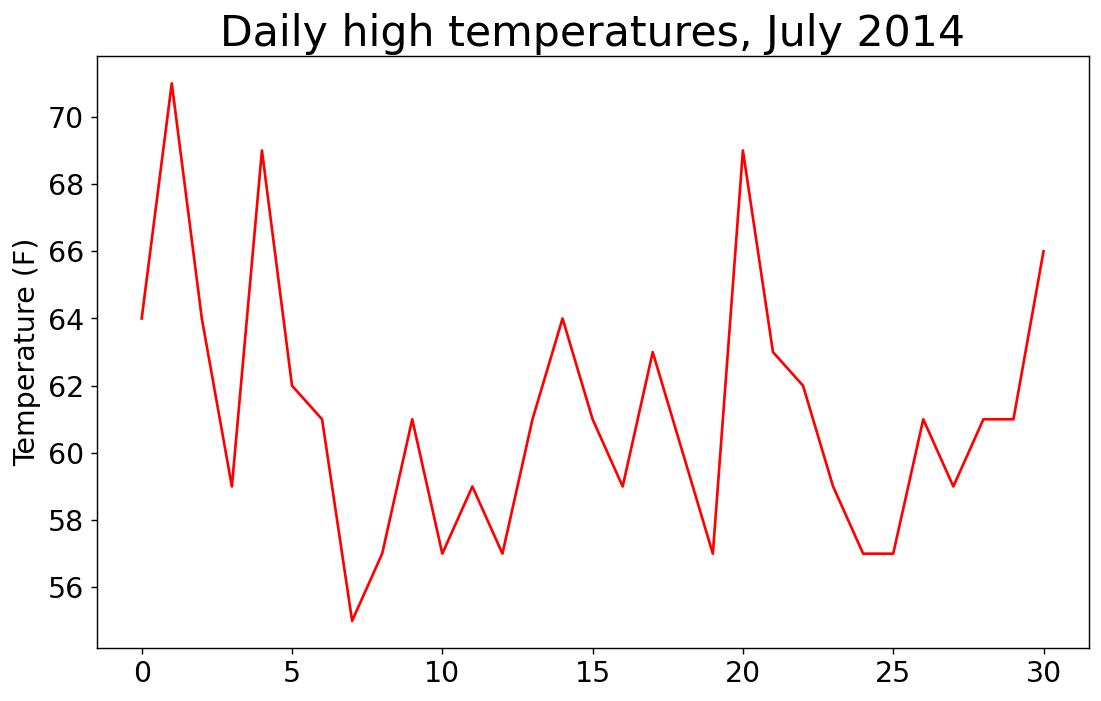

In [79]:
#high_lows
import csv
from matplotlib import pyplot as plt

# Obtém as temperaturas máximas do arquivo 
filename ='sitka_weather_07-2014.csv'
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader)

    highs = []
    for row in reader: 
        high=int(row[1])
        highs.append(high)
        
print(highs)

#Faz a plotagem dos dados
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(highs, c='red')
# Formata o gráfico 
plt.title("Daily high temperatures, July 2014", fontsize=24) 
plt.xlabel('', fontsize=16) 
plt.ylabel("Temperature (F)", fontsize=16) 
plt.tick_params(axis='both', which='major', labelsize=16) 
plt.show()

Passamos a **lista de temperaturas máximas para <code>plot() e c='red'</code> para plotar os pontos em vermelho. (Plotaremos as temperaturas máximas em vermelho e as mínimas em azul.) Então especificamos outros detalhes de formatação**, por exemplo, o tamanho da fonte e os rótulos, que você deverá reconhecer do Capítulo 15. **Como ainda precisamos acrescentar as datas, não daremos um nome ao <code>eixo x</code>, mas <code>plt.xlabel()</code> modifica o tamanho da fonte para deixar os rótulos-padrão<code></code> mais legíveis.** A Figura 16.1 mostra o gráfico resultante: <code>*um gráfico linear simples**</code> das temperaturas máximas em julho de 2014 para Sitka no Alasca.<code></code>

### Módulo <code>**datetime**</code>

Vamos adicionar as datas em nosso gráfico para deixá-lo mais útil. **A primeira data do arquivo de dados meteorológicos está na segunda linha do arquivo**:   
**2014-7-1,64,56,50,53,51,48,96,83,58,30.19,--trecho omitido--**   

Os dados serão lidos na forma de **<code>string</code>, portanto precisamos de um modo de converter a string '2014-7-1' em um objeto que represente essa <code>data</code>. Podemos construir um objeto que represente o dia 1 de julho de 2014 usando o método <code>strptime()</code> do módulo <code>datetime</code>**. Vamos ver como  <code>**strptime()**</code> funciona em uma sessão de terminal:

In [58]:
from datetime import datetime 
first_date = datetime.strptime('2014-7- 1', '%Y-%m-%d')
print(first_date)

2014-07-01 00:00:00


### Plotando datas

**Agora que sabemos como processar as datas de nosso arquivo <code>CSV</code>, podemos melhorar nossa <code>plotagem dos dados<\code> de temperatura extraindo as datas das máximas diárias e passando as datas e as temperaturas máximas para <code>plot()</code>**, como vemos a seguir: 

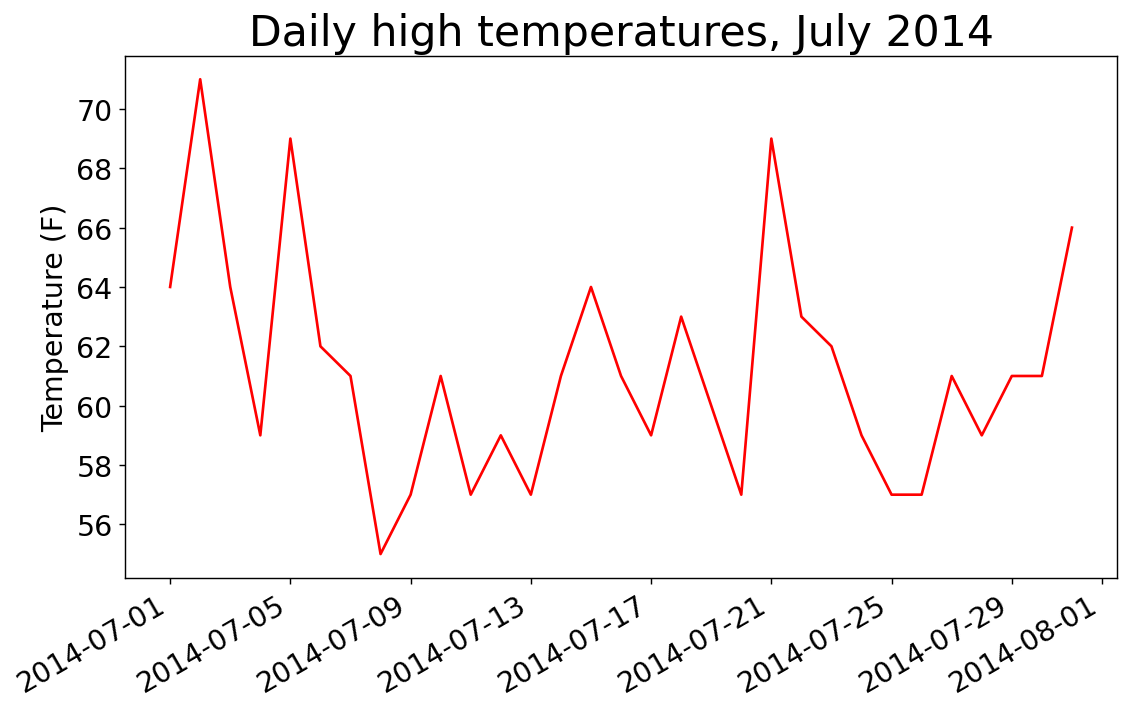

In [90]:
#highs_lows.py 
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Obtém as datas e as temperaturas máximas do arquivo 
filename = 'sitka_weather_07-2014.csv'
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader)
    
    dates, highs = [], []
    for row in reader: 
        current_date = datetime.strptime(row[0], "%Y-%m-%d") 
        dates.append(current_date)
        high = int(row[1]) 
        highs.append(high)
        
# Faz a plotagem dos dados 
fig = plt.figure(dpi=128, figsize=(10, 6)) 
plt.plot(dates, highs, c='red')
    
# Formata o gráfico 
plt.title("Daily high temperatures, July 2014", fontsize=24) 
plt.xlabel('', fontsize=16) 
fig.autofmt_xdate() 
plt.ylabel("Temperature (F)", fontsize=16) 
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

Criamos duas listas vazias para armazenar as datas e as temperaturas máximas do arquivo. **Então convertemos os dados que contêm as informações de datas <code>(row[0])</code> em um objeto <code>datetime</code> o concatenamos em <code>dates</code>. Passamos as datas e os valores das temperaturas máximas para <code>plot()</code>.** A chamada a **<code>fig.autofmt_xdate()</code> e desenha os rótulos com as datas na diagonal para evitar que se sobreponham.** A Figura 16.2 mostra o gráfico melhorado.

### Plotando um período de tempo maior

**Com o nosso gráfico configurado, vamos acrescentar mais dados para obter uma imagem mais completa do clima em 'Sitka'. Copie o arquivo <code>sitka_weather_2014.csv</code>, que contém dados do <code>Weather Underground para Sitka</code> durante um ano**, para a pasta em que você está armazenando os programas deste capítulo.

Agora podemos gerar um gráfico para o clima do ano todo:

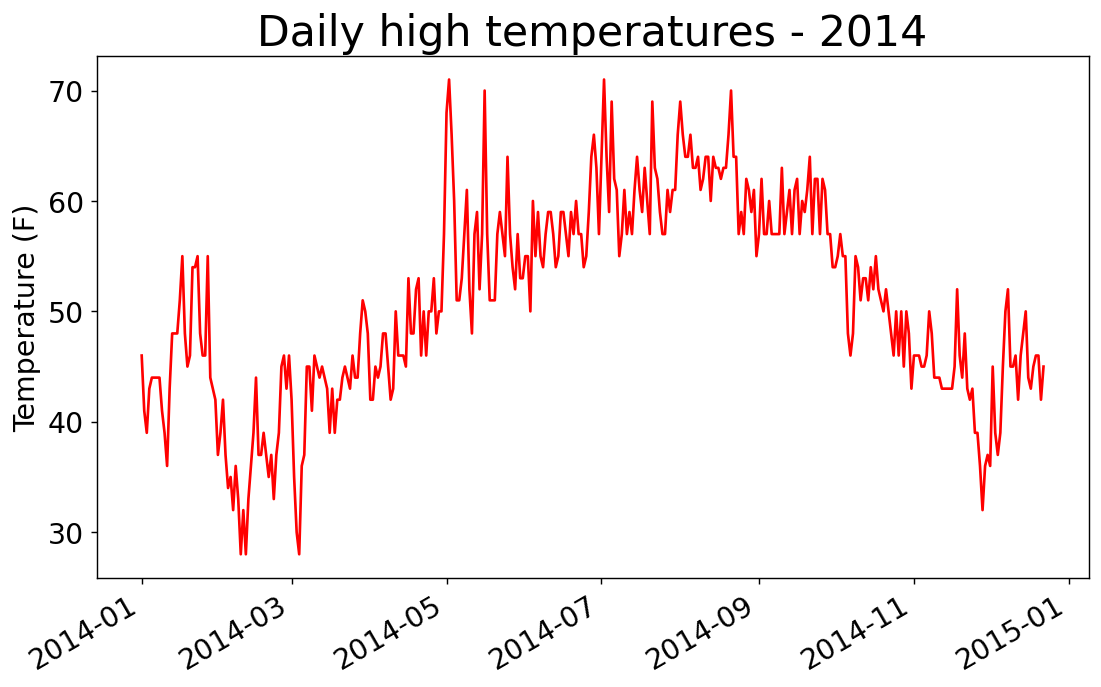

In [95]:
#highs_lows.py 
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Obtém as datas e as temperaturas máximas do arquivo 
filename = 'sitka_weather_2014.csv' #outro arquivo
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader)
    
    dates, highs = [], []
    for row in reader: 
        current_date = datetime.strptime(row[0], "%Y-%m-%d") 
        dates.append(current_date)
        high = int(row[1]) 
        highs.append(high)
        
# Faz a plotagem dos dados 
fig = plt.figure(dpi=128, figsize=(10, 6)) 
plt.plot(dates, highs, c='red')
    
# Formata o gráfico 
plt.title("Daily high temperatures - 2014", fontsize=24) 
plt.xlabel('', fontsize=16) 
fig.autofmt_xdate() 
plt.ylabel("Temperature (F)", fontsize=16) 
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

Modificamos o nome do arquivo para usar o novo arquivo de dados <code>**sitka_weather_2014.csv**</code> e atualizamos o título de nosso gráfico para que reflita a mudança em seu conteúdo. A Figura 16.3 mostra o gráfico resultante.

### Plotando uma segunda série de dados

O gráfico revisado da Figura 16.3 mostra uma quantidade substancial de dados significativos, mas podemos deixá-lo mais útil ainda se incluirmos as temperaturas mínimas. **Precisamos extrair as temperaturas mínimas do arquivo de dados e então adicioná-las ao nosso gráfico**, como vemos a seguir: 

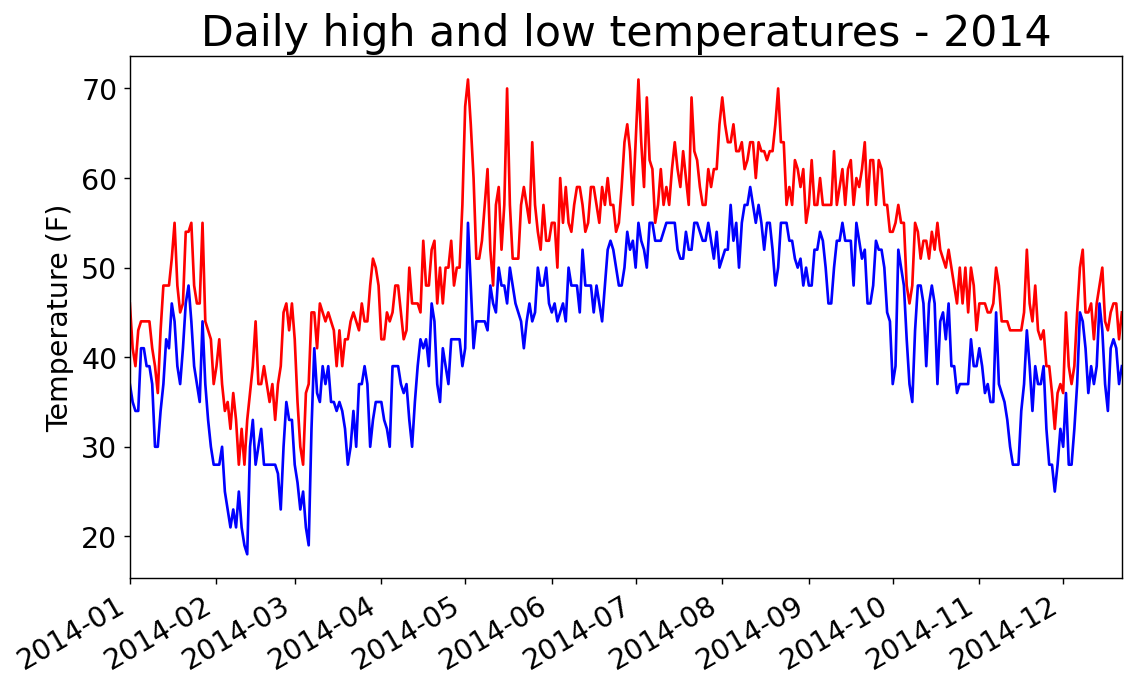

In [108]:
#highs_lows.py 
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Obtém as datas e as temperaturas máximas do arquivo 
filename = 'sitka_weather_2014.csv' #outro arquivo
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader)
    
    dates, highs, lows = [], [], []
    for row in reader: 
        current_date = datetime.strptime(row[0], "%Y-%m-%d") 
        dates.append(current_date)
        high = int(row[1]) 
        highs.append(high)
        low = int(row[3])
        lows.append(low)
        
# Faz a plotagem dos dados 
fig = plt.figure(dpi=128, figsize=(10, 6)) 
plt.plot(dates, highs, c='red')
plt.plot(dates, lows, c='blue')

# Ajusta os limites do eixo X para começar exatamente na primeira data
plt.xlim(dates[0], dates[-1])
    
# Formata o gráfico 
plt.title("Daily high and low temperatures - 2014", fontsize=24) 
plt.xlabel('', fontsize=16) 
fig.autofmt_xdate() 
plt.ylabel("Temperature (F)", fontsize=16) 
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

Adicionamos a **lista vazia <code>lows</code> para armazenar as temperaturas mínimas e então extraímos e armazenamos essas temperaturas para cada data, a partir da quarta posição de cada linha <code>(row[3])</code>**. E acrescentamos uma chamada a **<code>plot()</code> para as temperaturas mínimas e colorimos esses valores de azul**. Por fim, atualizamos o <code>**título**</code>. A Figura 16.4 mostra o gráfico resultante.

### Sombreando uma área do gráfico

Depois de ter adicionado duas séries de dados, podemos agora analisar a variação de temperatura para cada dia. Vamos acrescentar um toque final no gráfico usando **<code>sombreamento</code> para mostrar a variação entre as temperaturas mínima e máxima a cada dia.** Para isso usaremos o **método <code>fill_between()</code>, que aceita uma série de valores de <code>x</code> e duas séries de valores de <code>y</code>, e preenche o espaço entre as duas séries de valores de <code>y</code>**:

<Figure size 1280x768 with 0 Axes>

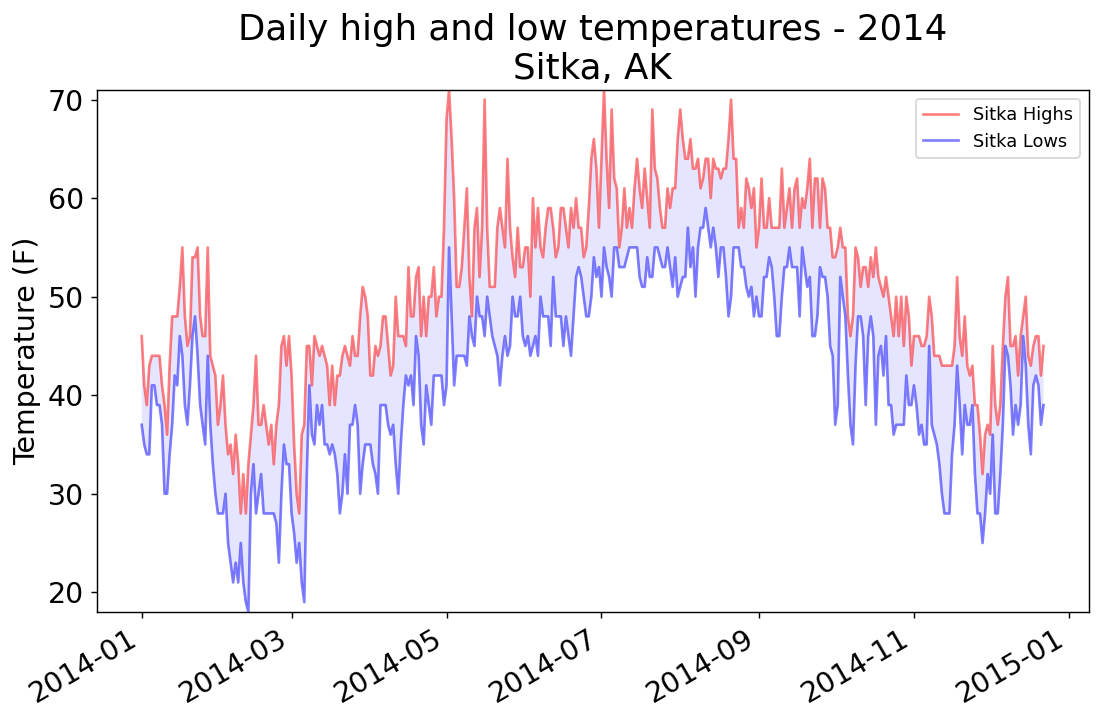

In [52]:
#highs_lows.py 
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Obtém as datas e as temperaturas máximas do arquivo 
filename = 'sitka_weather_2014.csv' #outro arquivo
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader)
    
    dates, highs, lows = [], [], []
    for row in reader: 
        current_date = datetime.strptime(row[0], "%Y-%m-%d") 
        dates.append(current_date)
        high = int(row[1]) 
        highs.append(high)
        low = int(row[3])
        lows.append(low)
        
# Configurar os limites do eixo Y
y_min = min(sitka_lows)
y_max = max(sitka_highs)
        
# Faz a plotagem dos dados 
fig = plt.figure(dpi=128, figsize=(10, 6)) 
fig = plt.figure(dpi=128, figsize=(10, 6)) 
plt.plot(sitka_dates, sitka_highs, c='red', alpha=0.5, label='Sitka Highs')
plt.plot(sitka_dates, sitka_lows, c='blue', alpha=0.5, label='Sitka Lows')
plt.fill_between(sitka_dates, sitka_highs, sitka_lows, facecolor='blue', alpha=0.1)
plt.ylim(y_min, y_max)  # Ajustar a escala do eixo Y

# Formata o gráfico 
plt.title("Daily high and low temperatures - 2014\nSitka, AK", fontsize=20)
plt.xlabel('', fontsize=16) 
fig.autofmt_xdate() 
plt.ylabel("Temperature (F)", fontsize=16) 
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()

plt.show()

**O argumento <code>alpha</code> e controla a transparência de uma cor. Um valor de <code>alpha igual a 0</code>  é totalmente transparente e <code>1 (o default)</code> é totalmente opaco. Ao definir <code>alpha com 0,5</code>, fazemos as linhas vermelha e azul do gráfico serem mais claras.**

E passamos para **<code>fill_between()</code> a lista <code>dates</code> para os valores de <code>x</code> e então as duas séries com valores de <code>y, highs e lows</code>**. O argumento **<code>facecolor</code> determina a cor da região sombreada, e lhe fornecemos um valor baixo de <code>alpha, igual a 0,1</code>, para que a região preenchida conecte as duas séries de dados sem provocar distrações na informação que elas representam.** A Figura 16.5 mostra o gráfico com a região **<code>sombreada entre as temperaturas máximas e mínimas</code>**.

O <code>**sombreamento**</code> ajuda a deixar o intervalo entre os dois conjuntos de dados imediatamente aparente.

### Verificação de erros

**Devemos ser capazes de executar o código de <code>'highs_lows.py'</code> usando dados de qualquer localidade.** Porém, algumas estações meteorológicas ocasionalmente funcionam mal e falham em coletar alguns dos dados que deveriam obter – ou todos eles. **A ausência de dados pode resultar em exceções capazes de causar falhas em nossos programas se não as tratarmos de forma apropriada**.

Por exemplo, vamos ver o que acontece quando tentamos gerar um gráfico de temperaturas para o Vale da Morte na Califórnia. Copie o arquivo <code>**'death_valley_2014.csv'**</code> para a pasta em que você está armazenando os programas deste capítulo e altere <code>**'highs_lows.py'**</code> para que gere um gráfico para o **Vale da Morte**:

In [126]:
#highs_lows.py 
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Obtém as datas e as temperaturas máximas do arquivo 
filename = 'death_valley_2014.csv' #outro arquivo
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader)
    
    dates, highs, lows = [], [], []
    for row in reader: 
        current_date = datetime.strptime(row[0], "%Y-%m-%d") 
        dates.append(current_date)
        high = int(row[1]) 
        highs.append(high)
        low = int(row[3])
        lows.append(low)
        
# Faz a plotagem dos dados 
fig = plt.figure(dpi=128, figsize=(10, 6)) 
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Ajusta os limites do eixo X para começar exatamente na primeira data
#plt.xlim(dates[0], dates[-1])
    
# Formata o gráfico 
plt.title("Daily high and low temperatures - 2014", fontsize=24) 
plt.xlabel('', fontsize=16) 
fig.autofmt_xdate() 
plt.ylabel("Temperature (F)", fontsize=16) 
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

ValueError: invalid literal for int() with base 10: ''

Quando executamos o programa, vemos um <code>**erro**</code>, conforme mostrado na última linha da saída a seguir:      
+ **Traceback (most recent call last): File "highs_lows.py", line 17, in <module> high = int(row[1]) ValueError: invalid literal for int() with base 10: ''**
    
O **<code>traceback</code>** nos informa que Python não foi capaz de processar a temperatura máxima para uma das datas porque não é possível transformar uma <code>**string vazia ('') em um inteiro</code>.** Uma observação em <code>**death_valley_2014.csv**</code> mostra qual é o problema:    
+ **2014-2- 16,,,,,,,,,,,,,,,,,,,0.00,,,-1**

Parece que em 16 de fevereiro de 2014, nenhum dado foi registrado; **a string para a temperatura máxima está vazia. Para cuidar desse problema, executaremos um código de <code>verificação de erros</code> quando os valores forem lidos do arquivo <code>CSV</code> para tratar exceções que possam surgir no parse de nossos conjuntos de dados**.     
Eis o modo como isso funciona:

2014-02-16 00:00:00 missing data


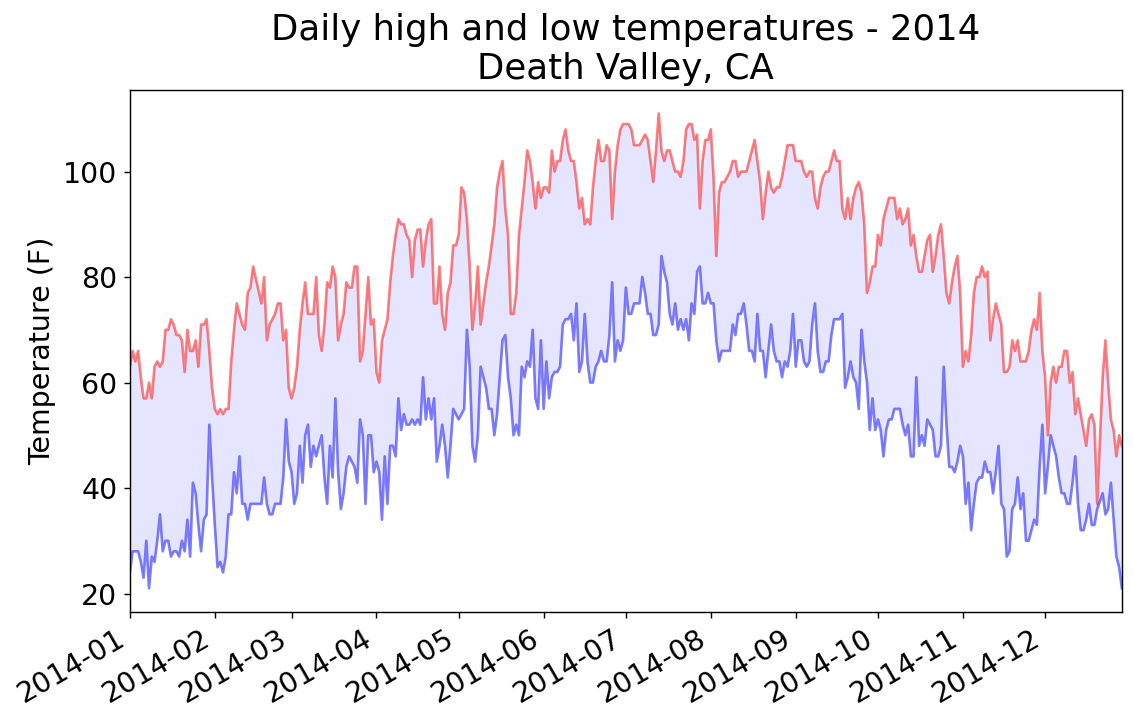

In [147]:
#highs_lows.py 
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Obtém as datas e as temperaturas máximas do arquivo 
filename = 'death_valley_2014.csv' #outro arquivo
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader)
    
    dates, highs, lows = [], [], []
    for row in reader: 
        try: 
            current_date = datetime.strptime(row[0], "%Y-%m-%d") 
            high = int(row[1]) 
            low = int(row[3]) 
        except ValueError: 
                print(current_date, 'missing data') 
        else: 
            dates.append(current_date) 
            highs.append(high) 
            lows.append(low)
        
# Faz a plotagem dos dados 
fig = plt.figure(dpi=128, figsize=(10, 6)) 
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Ajusta os limites do eixo X para começar exatamente na primeira data
plt.xlim(dates[0], dates[-1])
    
# Formata o gráfico 
title = "Daily high and low temperatures - 2014\nDeath Valley, CA"
plt.title(title, fontsize=20) 
plt.xlabel('', fontsize=16) 
fig.autofmt_xdate() 
plt.ylabel("Temperature (F)", fontsize=16) 
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

Sempre que analisamos uma linha, tentamos extrair a **<code>data</code> e as <code>temperaturas máxima e mínima</code>**. **Se houver algum dado faltando, Python levantará um <code>ValueError</code> e o trataremos exibindo uma mensagem de <code>erro</code> que inclua a data do dado ausente. Depois de exibir o <code>erro</code>, o laço continuará processando a próxima linha. Se todos os dados para uma data forem recuperados sem <code>erro</code>, o bloco <code>else</code> será executado e os dados serão concatenados nas listas apropriadas**. Como estamos plotando informações para uma nova localidade, atualizamos o <code>**título**</code> para que o nome do lugar seja incluído no gráfico.

Quando executar <code>**'highs_lows.py'**</code> agora, você verá que estão faltando dados apenas para uma data: **<code>2014-02-16 missing data</code>**. A Figura 16.6 mostra o gráfico resultante.

**Se compararmos esse gráfico com o gráfico de Sitka, podemos ver que o Vale da Morte é, de modo geral, mais quente que o sudeste do Alasca, como esperado, mas a variação da temperatura a cada dia, na verdade, é maior no deserto. A altura da região sombreada deixa isso claro.**

**Muitos conjuntos de dados com os quais você trabalhar terão dados faltando, dados formatados de maneira inapropriada ou dados incorretos**. Utilize as ferramentas que você conheceu na primeira metade deste livro para lidar com essas situações. **Nesse caso usamos um bloco <code>try-except-else</code> para tratar os dados ausentes. Às vezes você usará continue para ignorar alguns dados ou utilizará <code>remove() ou del</code> para eliminá-los depois que forem extraídos.** Qualquer abordagem que funcione pode ser usada, desde que o resultado seja uma visualização precisa e significativa.

## **FAÇA VOCÊ MESMO**

**16.1 – São Francisco:** As temperaturas em São Francisco são mais parecidas com as temperaturas em Sitka ou com as temperaturas no Vale da Morte? Gere um gráfico com as temperaturas máximas e mínimas de São Francisco e faça uma comparação. (Você pode fazer download de dados meteorológicos de praticamente qualquer localidade a partir de http://www.wunderground.com/history/. Especifique uma localidade e o intervalo de datas, faça rolagens para o final da página e localize um link chamado Comma-Delimited File (Arquivo delimitado por vírgula). Clique com o botão direito do mouse nesse link e salve os dados em um arquivo CSV.)

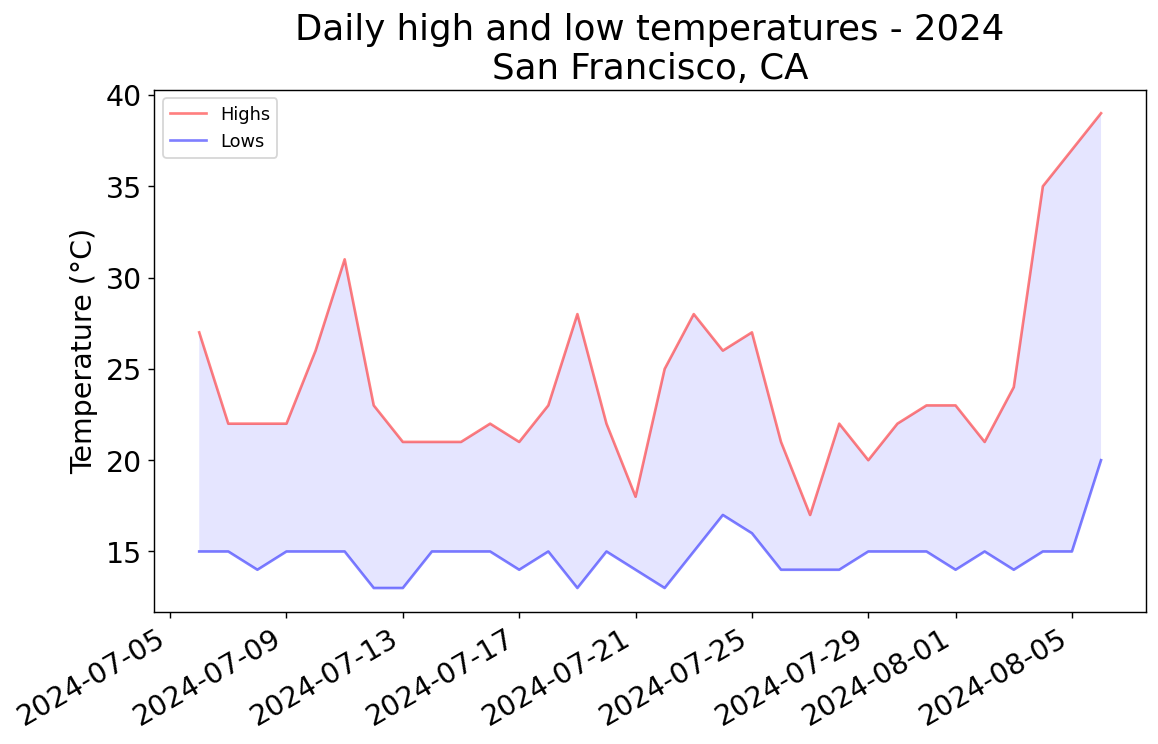

In [34]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Caminho para o arquivo CSV fornecido
filename = 'san_francisco_2024.csv'

# Inicializar listas para armazenar os dados
dates, highs, lows = [], [], []

# Lendo os dados do arquivo
with open(filename) as f: 
    reader = csv.reader(f)
    header_row = next(reader)  # Lê o cabeçalho
    
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(float(row[3]))  # 'tmax' está na quarta posição / # Converte de float para int
            low = int(float(row[2]))   # 'tmin' está na terceira posição /# Converte de float para int
        except ValueError:
            print(f"Data ausente ou inválida para a linha: {row}")
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)

# Faz a plotagem dos dados
fig = plt.figure(dpi=128, figsize=(10, 6)) 
plt.plot(dates, highs, c='red', alpha=0.5, label='Highs')
plt.plot(dates, lows, c='blue', alpha=0.5, label='Lows')
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Formata o gráfico
title = "Daily high and low temperatures - 2024\nSan Francisco, CA"
plt.title(title, fontsize=20) 
plt.xlabel('', fontsize=16) 
fig.autofmt_xdate() 
plt.ylabel("Temperature (°C)", fontsize=16) 
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()  # Adiciona uma legenda

# Exibir o gráfico
plt.show()

**16.2 – Comparação entre Sitka e o Vale da Morte:** As escalas de temperatura nos gráficos de Sitka e do Vale da Morte refletem os diferentes intervalos de dados. Para comparar as variações de temperatura entre Sitka e o Vale da Morte de modo preciso, é necessário usar escalas idênticas no eixo y. Mude as configurações do eixo y em um dos gráficos das Figuras 16.5 e 16.6, ou em ambos, e faça uma comparação direta entre as variações de temperatura em Sitka e no Vale da Morte (ou de quaisquer dois lugares que você queira comparar). Você também poderá tentar plotar os dois conjuntos de dados no mesmo gráfico.

Data ausente ou inválida para a linha: ['2014-2-16', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '0.00', '', '', '-1']


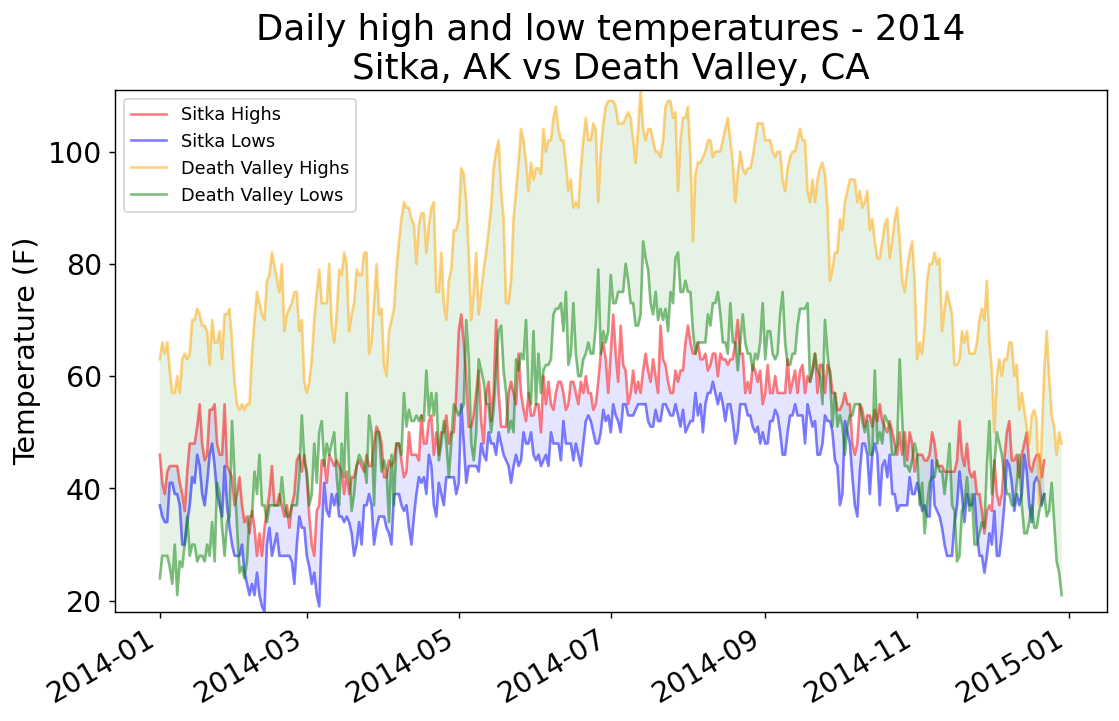

In [58]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Função para ler os dados de um arquivo CSV e retornar listas de datas, máximas e mínimas
def read_weather_data(filename):
    dates, highs, lows = [], [], []
    with open(filename) as f: 
        reader = csv.reader(f)
        header_row = next(reader)
        for row in reader:
            try:
                current_date = datetime.strptime(row[0], "%Y-%m-%d")
                high = int(row[1])
                low = int(row[3])
            except ValueError:
                print(f"Data ausente ou inválida para a linha: {row}")
            else:
                dates.append(current_date)
                highs.append(high)
                lows.append(low)
    return dates, highs, lows

# Carregar dados para Sitka e Vale da Morte
sitka_dates, sitka_highs, sitka_lows = read_weather_data('sitka_weather_2014.csv')
death_valley_dates, death_valley_highs, death_valley_lows = read_weather_data('death_valley_2014.csv')

# Configurar os limites comuns para o eixo Y
y_min = min(min(sitka_lows), min(death_valley_lows))
y_max = max(max(sitka_highs), max(death_valley_highs))

# Plotar ambos os conjuntos de dados no mesmo gráfico
fig = plt.figure(dpi=128, figsize=(10, 6)) 
plt.plot(sitka_dates, sitka_highs, c='red', alpha=0.5, label='Sitka Highs')
plt.plot(sitka_dates, sitka_lows, c='blue', alpha=0.5, label='Sitka Lows')
plt.plot(death_valley_dates, death_valley_highs, c='orange', alpha=0.5, label='Death Valley Highs')
plt.plot(death_valley_dates, death_valley_lows, c='green', alpha=0.5, label='Death Valley Lows')
plt.fill_between(sitka_dates, sitka_highs, sitka_lows, facecolor='blue', alpha=0.1)
plt.fill_between(death_valley_dates, death_valley_highs, death_valley_lows, facecolor='green', alpha=0.1)

# Ajustar a escala do eixo Y
plt.ylim(y_min, y_max)  

# Formata o gráfico
plt.title("Daily high and low temperatures - 2014\nSitka, AK vs Death Valley, CA", fontsize=20)
plt.xlabel('', fontsize=16) 
fig.autofmt_xdate() 
plt.ylabel("Temperature (F)", fontsize=16) 
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()
plt.show()

**16.3 – Índice pluviométrico:** Escolha qualquer lugar que seja de seu interesse e crie uma visualização que apresente o índice pluviométrico em um gráfico. Comece se concentrando nos dados de um mês e, em seguida, depois que seu código estiver funcionando, execute-o para os dados de um ano todo.

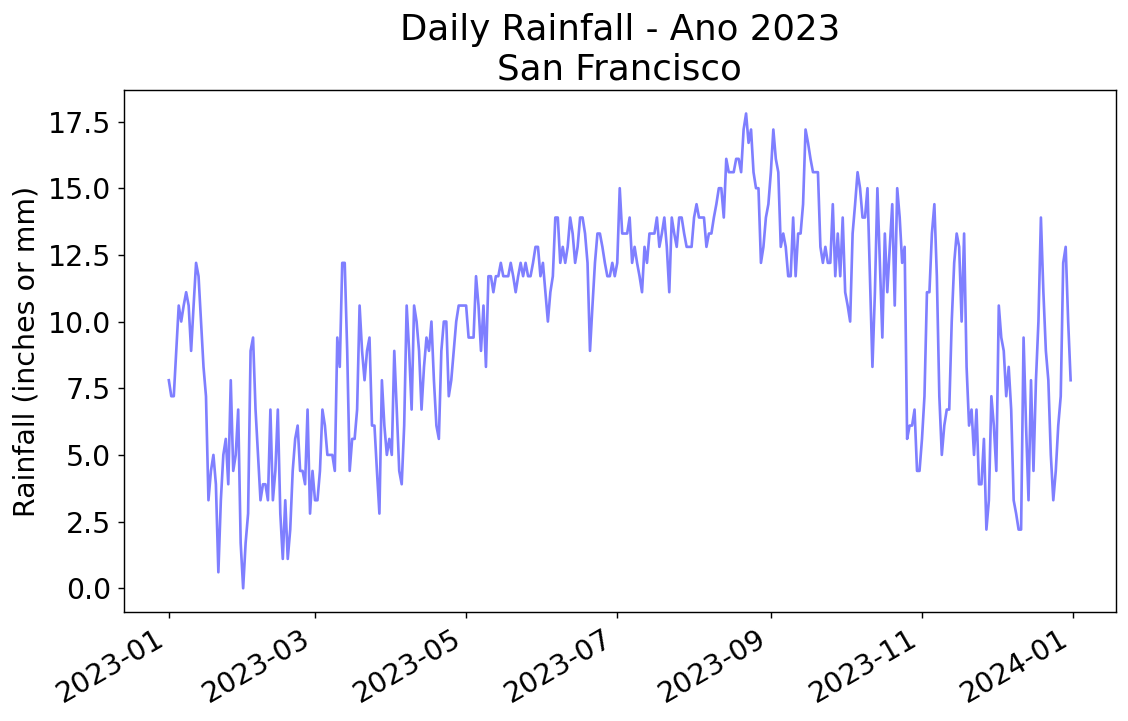

In [68]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Função para ler os dados de precipitação de um arquivo CSV
def read_rainfall_data(filename):
    dates, rainfalls = [], []
    with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)

        for row in reader:
            try:
                current_date = datetime.strptime(row[0], "%Y-%m-%d")
                rainfall = float(row[2])  # Ajuste o índice conforme o arquivo CSV (verifique a coluna de precipitação)
            except ValueError:
                print(f"Data ausente ou inválida para a linha: {row}")
            else:
                dates.append(current_date)
                rainfalls.append(rainfall)
                
    return dates, rainfalls

# Ler os dados de precipitação
filename = 'san_francisco_2023.csv'
dates, rainfalls = read_rainfall_data(filename)


# Plotar os dados de precipitação
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, rainfalls, c='blue', alpha=0.5)

plt.title("Daily Rainfall - Ano 2023\nSan Francisco", fontsize=20)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Rainfall (inches or mm)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

**16.4 – Explore:** Gere mais algumas visualizações que analisem qualquer outro aspecto climático de seu interesse para qualquer localidade sobre a qual você tenha curiosidade.

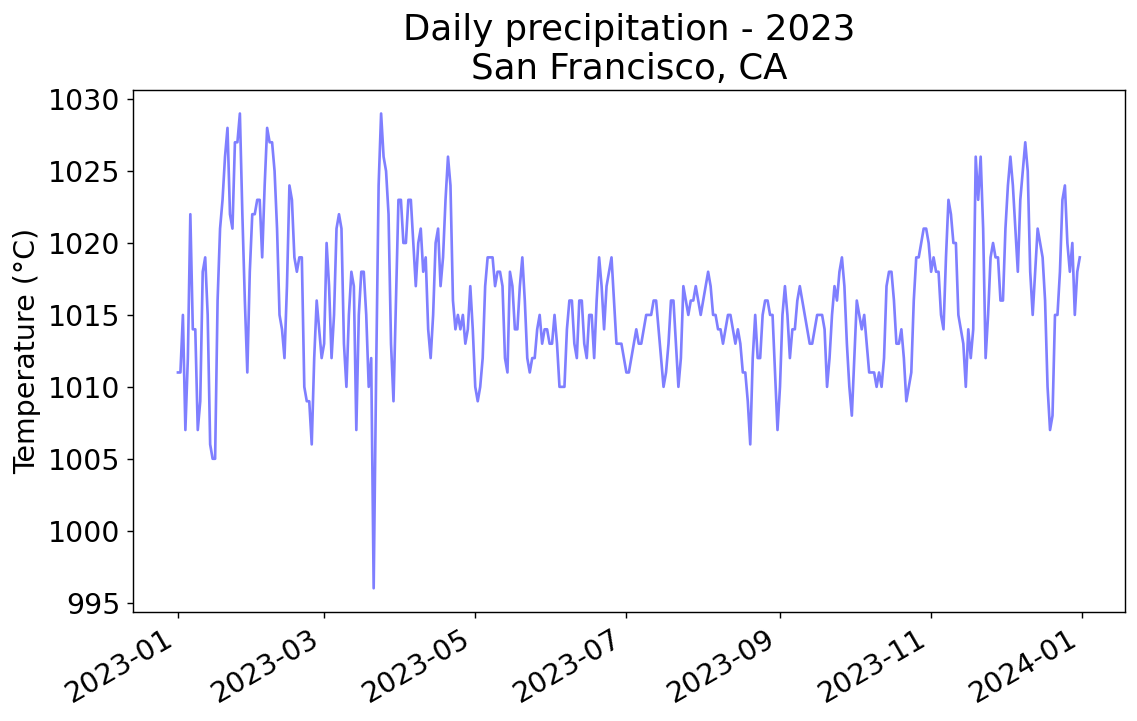

In [82]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

# Caminho para o arquivo CSV fornecido
filename = 'san_francisco_2023.csv'

# Inicializar listas para armazenar os dados
dates, precipitations = [], []

# Lendo os dados do arquivo
with open(filename) as f: 
    reader = csv.reader(f)
    header_row = next(reader)  # Lê o cabeçalho
    
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")
            precipitation = int(float(row[9]))  # 'tmax' está na quarta posição / # Converte de float para int
        except ValueError:
            print(f"Data ausente ou inválida para a linha: {row}")
        else:
            dates.append(current_date)
            precipitations.append(precipitation)
            

# Faz a plotagem dos dados
fig = plt.figure(dpi=128, figsize=(10, 6)) 
plt.plot(dates, precipitations, c='blue', alpha=0.5)

# Formata o gráfico
title = "Daily precipitation - 2023\nSan Francisco, CA"
plt.title(title, fontsize=20) 
plt.xlabel('', fontsize=16) 
fig.autofmt_xdate() 
plt.ylabel("Temperature (°C)", fontsize=16) 
plt.tick_params(axis='both', which='major', labelsize=16)

# Exibir o gráfico
plt.show()

****

## **Mapeando conjuntos de dados globais: <code>formato JSON</code>**

Nesta seção você fará o **download de dados de diferentes países em <code>formato JSON</code> e trabalhará com esses dados usando o módulo <code>json</code>. Utilizando a ferramenta de mapeamento amigável a iniciantes do <code>Pygal</code> para dados baseados em países, você criará visualizações desses dados a fim de explorar padrões globais que dizem respeito à distribuição da população mundial por diferentes países.**

### Fazendo download dos dados da população mundial

Copie o arquivo <code>**population_data.json**</code>, que contém dados sobre as populações da maior parte dos países do mundo, de 1960 a 2010, para a pasta em que você está armazenando os programas deste capítulo. Esses dados são provenientes de um dos muitos conjuntos de dados que a Open Knowledge Foundation (http://data.okfn.org/) disponibiliza gratuitamente.

### Extraindo dados relevantes

Vamos observar o arquivo <code>**population_data.json**</code> para ver como podemos começar a processar seus dados:

In [ ]:
population_data.json [{"Country Name": "Arab World", "Country Code": "ARB", "Year": "1960", "Value": "96388069"}, 
                      { "Country Name": "Arab World", "Country Code": "ARB", "Year": "1961", "Value": "98882541.4"},.....], 
--trecho omitido--

O arquivo é composto basicamente de uma longa lista Python. Cada item é um <code>**dicionário**</code> com quatro chaves: **o nome de um país, o seu código, um ano e um valor que representa a população**. Queremos analisar o nome de cada país e a população somente em 2010, portanto começaremos escrevendo um programa que exiba apenas essas informações:

In [5]:
#world_population.py
import json

# Carrega os dados em uma lista 
filename = 'population_data.json' 
with open(filename) as f: 
    pop_data = json.load(f)

# Exibe a população de cada país em 2010
for pop_dict in pop_data: 
    if pop_dict['Year'] == '2010': 
        country_name = pop_dict['Country Name']
        population = pop_dict['Value']

        print(country_name + ": " + population)

Arab World: 357868000
Caribbean small states: 6880000
East Asia & Pacific (all income levels): 2201536674
East Asia & Pacific (developing only): 1961558757
Euro area: 331766000
Europe & Central Asia (all income levels): 890424544
Europe & Central Asia (developing only): 405204000
European Union: 502125000
Heavily indebted poor countries (HIPC): 635663000
High income: 1127437398.85751
High income: nonOECD: 94204398.857512
High income: OECD: 1033233000
Latin America & Caribbean (all income levels): 589011025.857512
Latin America & Caribbean (developing only): 582551688
Least developed countries: UN classification: 835140827
Low & middle income: 5767157445
Low income: 796342000
Lower middle income: 2518690865
Middle East & North Africa (all income levels): 382803000
Middle East & North Africa (developing only): 331263000
Middle income: 4970815445
North America: 343539600
OECD members: 1236521688
Other small states: 18293000
Pacific island small states: 3345337
Small states: 28518337
South

Inicialmente importamos o **módulo <code>json</code> para que seja possível carregar os dados do arquivo de forma apropriada e, em seguida, armazenamos esses dados em <code>pop_data</code>. A função <code>json.load()</code> converte os dados em um formato com que Python possa trabalhar**: nesse caso, em uma <code>**lista**</code>. E percorremos cada item de <code>**pop_data**</code> com um laço. **Cada item é um <code>dicionário</code> com quatro <code>**pares chave-valor**</code>, e o armazenamos em pop_dict<code>pop_dict</code>.**

E procuramos **2010 na chave 'Year' de cada dicionário**. (Como os valores em <code>**'population_data.json'**</code> estão todos entre aspas, fazemos uma comparação entre strings.) **Se o ano for 2010, armazenamos o valor associado a <code>'Country Name' em country_name e o valor associado a 'Value' em population</code>. Então exibimos o nome de cada país e a sua população.**
A saída é composta de uma série de nomes de países e a população.

Nem todos os dados capturados incluem os nomes exatos dos países, mas esse é um bom ponto de partida. **Agora precisamos converter os dados em um formato com que o <code>Pygal</code> possa trabalhar.**

### Convertendo <code>**strings em valores numéricos**</code> 

**Todas as chaves e valores em <code>population_data.json</code> estão armazenados como <code>strings</code>**. Para trabalhar com os dados referentes às populações, devemos converter as strings com as populações em valores numéricos.
Fazemos isso usando a função <code>**int()**</code>:

In [13]:
#world_population.py
import json

# Carrega os dados em uma lista 
filename = 'population_data.json' 
with open(filename) as f: 
    pop_data = json.load(f)

# Exibe a população de cada país em 2010
for pop_dict in pop_data: 
    if pop_dict['Year'] == '2010': 
        country_name = pop_dict['Country Name']
        population = int(pop_dict['Value'])
       

        print(country_name + ": " + str(population))

Arab World: 357868000
Caribbean small states: 6880000
East Asia & Pacific (all income levels): 2201536674
East Asia & Pacific (developing only): 1961558757
Euro area: 331766000
Europe & Central Asia (all income levels): 890424544
Europe & Central Asia (developing only): 405204000
European Union: 502125000
Heavily indebted poor countries (HIPC): 635663000


ValueError: invalid literal for int() with base 10: '1127437398.85751'

**Agora armazenamos o valor de cada população em um formato numérico. Quando exibimos o valor da população, devemos convertê-lo para uma <code>**string**</code>.**
No entanto, essa mudança resulta em um erro para alguns valores, como vemos a seguir:

**Arab World: 357868000    
Caribbean small states: 6880000    
East Asia & Pacific (all income levels): 2201536674    
--trecho omitido--    
Traceback (most recent call last): File "print_populations.py", line 12, in <module> population = int(pop_dict['Value'])   <code>ValueError: invalid literal for int() with base 10: '1127437398.85751'</code>**

Com frequência, dados brutos não estão formatados de forma consistente, portanto podemos nos deparar com vários erros. Nesse caso, o erro ocorreu porque Python não é capaz de transformar uma <code>**string**</code> contendo um decimal, **'1127437398.85751'**, diretamente em um <code>**inteiro**</code>. (**Esse valor decimal provavelmente é o resultado da interpolação para os anos em que a contagem de uma população específica não foi feita.) Tratamos esse erro convertendo a <code>string</code> em um número de ponto flutuante e então convertendo esse número em um <code>inteiro</code>**:

In [22]:
#world_population.py
import json

# Carrega os dados em uma lista 
filename = 'population_data.json' 
with open(filename) as f: 
    pop_data = json.load(f)

# Exibe a população de cada país em 2010
for pop_dict in pop_data: 
    if pop_dict['Year'] == '2010': 
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
       

        print(country_name + ": " + str(population))

Arab World: 357868000
Caribbean small states: 6880000
East Asia & Pacific (all income levels): 2201536674
East Asia & Pacific (developing only): 1961558757
Euro area: 331766000
Europe & Central Asia (all income levels): 890424544
Europe & Central Asia (developing only): 405204000
European Union: 502125000
Heavily indebted poor countries (HIPC): 635663000
High income: 1127437398
High income: nonOECD: 94204398
High income: OECD: 1033233000
Latin America & Caribbean (all income levels): 589011025
Latin America & Caribbean (developing only): 582551688
Least developed countries: UN classification: 835140827
Low & middle income: 5767157445
Low income: 796342000
Lower middle income: 2518690865
Middle East & North Africa (all income levels): 382803000
Middle East & North Africa (developing only): 331263000
Middle income: 4970815445
North America: 343539600
OECD members: 1236521688
Other small states: 18293000
Pacific island small states: 3345337
Small states: 28518337
South Asia: 1633146000
Su

**A função <code>float()</code> transforma a <code>string</code> em um decimal, e a função <code>int()</code> remove a parte decimal do número e devolve um <code>inteiro</code>.** Agora podemos exibir um conjunto completo de valores de populações para o ano de 2010, sem erros.

**Cada <code>string</code> foi convertida com sucesso em um número de <code>ponto flutuante</code> e depois para um <code>inteiro</code>.** Agora que os valores dessas populações estão armazenados em um formato numérico, podemos usá- los para criar um mapa da população mundial.

### Obtendo os códigos de duas letras dos países

Antes de podermos nos concentrar no <code>**mapeamento**</code>, devemos tratar um último aspecto dos dados. **A <code>ferramenta de mapeamento do Pygal</code> espera dados em um formato particular: **os países devem ser fornecidos na forma de <code>**códigos**</code> e as populações como <code>**valores**</code>**. Vários conjuntos padronizados de códigos de países são usados com frequência quando trabalhamos com dados geopolíticos; o**s códigos incluídos em <code>**population_data.json**</code> são códigos de três letras, mas o <code>Pygal</code> utiliza códigos de duas letras.** Precisamos de uma maneira de descobrir o código de duas letras a partir do nome do país.<code></code>

**Os códigos dos países no <code>Pygal</code> estão armazenados em um módulo chamado <code>pygal.maps.world ou pycountry</code>, que é uma abreviatura para <code>internationalization (internacionalização)</code>.** O <code>**dicionário COUNTRIES**</code> contém os códigos de duas letras dos países como <code>**chaves**</code> e os nomes dos países como <code>**valores**</code>. Para ver esses códigos, importe o dicionário do módulo <code>**pygal.maps.world ou pycountry**</code> e exiba suas chaves e valores:

In [3]:
#country_codes.py
from pygal.maps.world import COUNTRIES

for country_code in sorted(COUNTRIES.keys()): 
    print(country_code, COUNTRIES[country_code])

ad Andorra
ae United Arab Emirates
af Afghanistan
al Albania
am Armenia
ao Angola
aq Antarctica
ar Argentina
at Austria
au Australia
az Azerbaijan
ba Bosnia and Herzegovina
bd Bangladesh
be Belgium
bf Burkina Faso
bg Bulgaria
bh Bahrain
bi Burundi
bj Benin
bn Brunei Darussalam
bo Bolivia, Plurinational State of
br Brazil
bt Bhutan
bw Botswana
by Belarus
bz Belize
ca Canada
cd Congo, the Democratic Republic of the
cf Central African Republic
cg Congo
ch Switzerland
ci Cote d'Ivoire
cl Chile
cm Cameroon
cn China
co Colombia
cr Costa Rica
cu Cuba
cv Cape Verde
cy Cyprus
cz Czech Republic
de Germany
dj Djibouti
dk Denmark
do Dominican Republic
dz Algeria
ec Ecuador
ee Estonia
eg Egypt
eh Western Sahara
er Eritrea
es Spain
et Ethiopia
fi Finland
fr France
ga Gabon
gb United Kingdom
ge Georgia
gf French Guiana
gh Ghana
gl Greenland
gm Gambia
gn Guinea
gq Equatorial Guinea
gr Greece
gt Guatemala
gu Guam
gw Guinea-Bissau
gy Guyana
hk Hong Kong
hn Honduras
hr Croatia
ht Haiti
hu Hungary
id Indo

No laço <code>**for**</code>, dizemos a Python para colocar as chaves em ordem alfabética. Então exibimos o código de cada país e o nome associado a ele:

In [11]:
#country_codes.py
# Formula para obter os códigos de países
import pycountry

for country in sorted(pycountry.countries, key=lambda x: x.alpha_2):
    print(country.alpha_2, country.name)

AD Andorra
AE United Arab Emirates
AF Afghanistan
AG Antigua and Barbuda
AI Anguilla
AL Albania
AM Armenia
AO Angola
AQ Antarctica
AR Argentina
AS American Samoa
AT Austria
AU Australia
AW Aruba
AX Åland Islands
AZ Azerbaijan
BA Bosnia and Herzegovina
BB Barbados
BD Bangladesh
BE Belgium
BF Burkina Faso
BG Bulgaria
BH Bahrain
BI Burundi
BJ Benin
BL Saint Barthélemy
BM Bermuda
BN Brunei Darussalam
BO Bolivia, Plurinational State of
BQ Bonaire, Sint Eustatius and Saba
BR Brazil
BS Bahamas
BT Bhutan
BV Bouvet Island
BW Botswana
BY Belarus
BZ Belize
CA Canada
CC Cocos (Keeling) Islands
CD Congo, The Democratic Republic of the
CF Central African Republic
CG Congo
CH Switzerland
CI Côte d'Ivoire
CK Cook Islands
CL Chile
CM Cameroon
CN China
CO Colombia
CR Costa Rica
CU Cuba
CV Cabo Verde
CW Curaçao
CX Christmas Island
CY Cyprus
CZ Czechia
DE Germany
DJ Djibouti
DK Denmark
DM Dominica
DO Dominican Republic
DZ Algeria
EC Ecuador
EE Estonia
EG Egypt
EH Western Sahara
ER Eritrea
ES Spain
ET Ethi

Para extrair o código do país, escrevemos uma função que faz uma pesquisa em **COUNTRIES** e devolve esse código. Escreveremos esse código em um módulo separado chamado **'country_codes'** para que possamos importá-lo depois em um programa de visualização:

In [14]:
#country_code.py
from pygal.maps.world import COUNTRIES

def get_country_code(country_name): 
    """Devolve o código de duas letras do Pygal para um país, dado o seu nome."""
    for code, name in COUNTRIES.items(): 
        if name == country_name: 
            return code # Se o país não foi encontrado, devolve None x return None
    
print(get_country_code('Andorra')) 
print(get_country_code('United Arab Emirates')) 
print(get_country_code('Afghanistan'))

ad
ae
af


**Passamos o nome do país para <code>get_country_code()</code> e o armazenamos no parâmetro <code>country_name</code>. Em seguida, percorremos os pares de <code>código-nome</code> do país em <code>COUNTRIES</code> com um laço. Se o nome do país for encontrado, o código desse país será devolvido. Adicionamos uma linha depois do laço para devolver <code>**None**</code> se o nome do país não for encontrado.** Por fim, passamos os nomes de três países para conferir se a função está correta. Como esperado, o programa mostra os códigos de duas letras para três países.

Antes de usar essa função, remova as instruções <code>**print**</code> de <code>**country_codes.py**</code>.
Em seguida, importamos <code>**get_country_code()**</code> em <code>**world_population.py**</code>:

In [25]:
#world_population.py 
import json
from country_codes import get_country_code

# Carrega os dados em uma lista 
filename = 'population_data.json' 
with open(filename) as f: 
    pop_data = json.load(f)

# Exibe a população de cada país em 2010
for pop_dict in pop_data: 
    if pop_dict['Year'] == '2010': 
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country_name) 
        
        if code:
            print(code + ": " + str(population))
        else: 
            print('ERROR - ' + country_name)

ERROR - Arab World
ERROR - Caribbean small states
ERROR - East Asia & Pacific (all income levels)
ERROR - East Asia & Pacific (developing only)
ERROR - Euro area
ERROR - Europe & Central Asia (all income levels)
ERROR - Europe & Central Asia (developing only)
ERROR - European Union
ERROR - Heavily indebted poor countries (HIPC)
ERROR - High income
ERROR - High income: nonOECD
ERROR - High income: OECD
ERROR - Latin America & Caribbean (all income levels)
ERROR - Latin America & Caribbean (developing only)
ERROR - Least developed countries: UN classification
ERROR - Low & middle income
ERROR - Low income
ERROR - Lower middle income
ERROR - Middle East & North Africa (all income levels)
ERROR - Middle East & North Africa (developing only)
ERROR - Middle income
ERROR - North America
ERROR - OECD members
ERROR - Other small states
ERROR - Pacific island small states
ERROR - Small states
ERROR - South Asia
ERROR - Sub-Saharan Africa (all income levels)
ERROR - Sub-Saharan Africa (developing

**Depois de extrair o nome do país e a população, armazenamos o código desse país em <code>code</code>, ou <code>None</code> se nenhum código estiver disponível. Se um código for devolvido, o código e a população do país serão exibidos. Se o código não estiver disponível, exibimos uma mensagem de erro com o nome do país cujo código não encontramos.** Execute o programa e você verá alguns códigos de países com suas populações e algumas linhas com erro.

**Os erros têm duas origens. Em primeiro lugar, nem todas as classificações no conjunto de dados são feitas por país; algumas estatísticas de população são para regiões (Arab World, ou Mundo Árabe) e grupos econômicos (all income levels, ou todos os níveis de renda).** Em segundo lugar, algumas das estatísticas usam um sistema diferente para nomes completos de países **(Yemen, Rep. em vez de Yemen)**. Por enquanto, omitiremos os dados de países que causam erros e veremos como será a aparência de nosso mapa para os dados recuperados com sucesso.

### Construindo um <code>**mapa-múndi**</code>

**Com os códigos dos países que temos, criar um <code>mapa-múndi</code> é rápido e fácil.** O <code>**Pygal**</code> inclui um tipo de mapa chamado <code>**Worldmap**</code> para ajudar a mapear conjuntos de dados globais. Como exemplo de como usar o <code>**Worldmap**</code>, criaremos um mapa simples que destaque a **América do Norte, a América Central e a América do Sul**: 

In [4]:
#americas.py 
import pygal
from pygal.maps.world import World

wm = World()
wm.title = 'North, Central, and South America'
wm.add('North America', ['ca', 'mx', 'us']) 
wm.add('Central America', ['bz', 'cr', 'gt', 'hn', 'ni', 'pa', 'sv']) 
wm.add('South America', ['ar', 'bo', 'br', 'cl', 'co', 'ec', 'gf', 'gy', 'pe', 'py', 'sr', 'uy', 've'])
wm.render_to_file('americas.svg')

Em criamos **uma instância da classe <code>Worldmap</code> e definimos o atributo <code>title</code> do mapa. Em usamos o método <code>add()</code>, que aceita um rótulo e uma lista de códigos de países que queremos destacar.** Cada chamada a <code>**add()**</code> define uma nova cor para o conjunto de países e acrescenta essa cor a uma legenda à esquerda da imagem, com o rótulo especificado nessa chamada. **Queremos que toda a região da América do Norte seja representada com uma cor, portanto colocamos <code>'ca', 'mx' e 'us'</code> na lista que passamos para a primeira chamada a <code>add()</code> a fim de dar destaque ao Canadá, ao México e aos Estados Unidos em conjunto**. Então fizemos o mesmo para os países da América Central e da América do Sul.

**O método <code>render_to_file()</code> e cria um arquivo <code>.svg</code> contendo o mapa, que poderá ser aberto em seu navegador.** A saída é um mapa que destaca a América do Norte, a América Central e a América do Sul com cores diferentes, como mostra a Figura 16.7.

**Agora sabemos como criar um mapa com áreas coloridas, uma legenda e rótulos claros.** Vamos adicionar dados ao nosso mapa para mostrar informações sobre um país.

### Plotando dados numéricos em um <code>**mapa-múndi**</code>

**Para exercitar a forma de colocar dados numéricos em um mapa, crie um mapa que mostre as populações dos três países da América do Norte:**

In [16]:
#na_population.py
import pygal
from pygal.maps.world import World

wm = World() 
wm.title = 'Populations of Countries in North America'
wm.add('North America', {'ca': 34126000, 'us': 309349000, 'mx': 113423000})
wm.render_to_file('na_populations.svg')

Inicialmente crie **uma instância de <code>Worldmap()/World()</code> e defina um título. Então utilize o método <code>add()</code>, mas desta vez passe um dicionário como segundo argumento em vez de passar uma lista. O dicionário contém os códigos de duas letras do <code>Pygal</code> para os países como chaves e as populações como valores.** O <code>**Pygal**</code> utiliza automaticamente esses números para sombrear os países, variando da cor mais clara (menos populosos) para a cor mais escura (mais populosos). A Figura 16.8 mostra o mapa resultante.


**Esse mapa é interativo: se passar o mouse sobre cada país, você verá a sua população. Vamos acrescentar mais dados em nosso mapa.**

### Criando um mapa completo de populações


Para plotar os valores das populações para o restante dos países, devemos converter os dados dos países que processamos anteriormente em um formato de dicionário esperado pelo Pygal<code></code>, que é composto dos códigos de duas letras para os países como <code>**chaves**</code> e as populações como <code>**valores**</code>. Acrescente o código a seguir em <code>**world_population.py**</code>:

In [109]:
#world_population.py
import json
import pygal
from pygal.maps.world import World
from country_codes import get_country_code

# Carrega os dados em uma lista
filename = 'population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# Constrói um dicionário com dados das populações
cc_populations = {}
for pop_dict in pop_data:
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country_name)
        
        if code:
            cc_populations[code] = population

# Cria um mapa mundial e adiciona as populações
wm = World()
wm.title = 'World Population in 2010, by Country'
wm.add('2010', cc_populations)

# Salva o mapa em um arquivo
wm.render_to_file('world_population.svg')

af
kr
None


E criamos **um <code>dicionário vazio</code> para armazenar os códigos dos países e as populações no formato esperado pelo <code>Pygal</code>. E construímos o dicionário <code>cc_populations</code> usando o código do país como chave e a população como valor sempre que um código é devolvido.** Também removemos todas as instruções <code>**print**</code>.

Criamos **uma instância de <code>Worldmap ou World</code> e definimos seu atributo <code>title</code>. Quando chamamos <code>add()</code>, passamos o dicionário com os códigos dos países e as populações para esse método.** A Figura 16.9 mostra o mapa gerado. Não temos dados para alguns países, que estão em preto, mas a maioria deles está colorida de acordo com o tamanho de sua população.

**Você lidará com dados ausentes mais adiante neste capítulo, mas antes disso vamos alterar o sombreamento para que reflita de modo mais exato a população dos países. No momento, nosso mapa mostra muitos países com tons claros e dois países com tons bem escuros.** O contraste entre a maioria dos países não é suficiente para mostrar quão populosos eles são, uns em relação aos outros. Corrigiremos isso agrupando os países em níveis de população e sombreando cada grupo.

### Agrupando os países de acordo com a sua população

**Como a China e a Índia são bem mais populosas que os outros países, o mapa mostra pouco contraste.** A China e a Índia têm, cada uma delas, mais de um bilhão de pessoas, enquanto o próximo país mais populoso são os Estados Unidos, com aproximadamente 300 milhões de pessoas. **Em vez de plotar todos os países como um grupo, vamos separá-los em três níveis populacionais: menos de 10 milhões, entre 10 milhões e 1 bilhão e acima de 1 bilhão.**

In [51]:
import json
import pygal
from pygal.maps.world import World
from country_codes import get_country_code

# Carrega os dados em uma lista
filename = 'population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# Constrói um dicionário com dados das populações
cc_populations = {}
for pop_dict in pop_data:
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country_name)
        
        if code:
            cc_populations[code] = population

# Agrupa os países em três níveis populacionais
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop
        
# Vê quantos países estão em cada nível
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

# Cria um mapa mundial e adiciona as populações
wm = World()
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

# Salva o mapa em um arquivo
wm.render_to_file('world_population.svg')

85 69 2


Para agrupar os países, **criamos um <code>dicionário vazio</code> para cada categoria. Então percorremos <code>cc_populations</code> com um laço a fim de verificar a população de cada país. O bloco <code>if-elif-else</code> adiciona uma entrada no dicionário apropriado <code>(cc_pops_1, cc_pops_2 ou cc_pops_3)</code> para cada par código de <code>país- população</code>.**

**E exibimos o tamanho de cada um desses dicionários para descobrir o tamanho dos grupos. Quando plotamos os dados, garantimos que todos os três grupos sejam adicionados em <code>Worldmap</code>.** Ao executar esse programa, você verá inicialmente o tamanho de cada grupo: 85 69 2

Essa saída mostra que há 85 países com menos de 10 milhões de pessoas, 69 países com população entre 10 milhões e 1 bilhão de pessoas e dois países extremos com mais de 1 bilhão. Parece ser uma divisão uniforme o suficiente para um mapa informativo. A Figura 16.10 mostra o mapa resultante.

**Agora três cores diferentes nos ajudam a ver as distinções entre os níveis populacionais.** Em cada um desses três níveis, os países são sombreados da cor clara para a cor mais escura, correspondendo à variação das populações menores para as maiores.

### Estilizando mapas-múndi com o <code>**Pygal**</code>

**Embora os grupos populacionais em nosso mapa sejam eficientes, as configurações default para as cores não são bonitas:** por exemplo, nesse caso, o <code>**Pygal**</code> escolheu um rosa-choque e um tom de verde. **Usaremos as diretivas de estilização do <code>**Pygal**</code> para corrigir as cores.**
Vamos orientar o <code>**Pygal**</code> para que use uma cor de base novamente, porém desta vez escolheremos a cor e aplicaremos um sombreamento mais distinto para os três grupos populacionais:

In [61]:
#world_population.py
import json
import pygal
from pygal.style import RotateStyle
from pygal.maps.world import World
from country_codes import get_country_code


# Carrega os dados em uma lista
filename = 'population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# Constrói um dicionário com dados das populações
cc_populations = {}
for pop_dict in pop_data:
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country_name)
        
        if code:
            cc_populations[code] = population

# Agrupa os países em três níveis populacionais
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop
        
# Vê quantos países estão em cada nível
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

# Cria um mapa mundial e adiciona as populações

wm_style = RotateStyle('#336699') 
wm = World(style=wm_style)
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

# Salva o mapa em um arquivo
wm.render_to_file('world_population.svg')

85 69 2


**Os estilos do <code>Pygal</code> estão armazenados no módulo <code>style</code> do qual importamos o estilo <code>RotateStylek</code>. Essa classe aceita um argumento, que é uma cor <code>RGB</code> em formato <code>hexa</code>.** O <code>Pygal</code> então escolhe as cores para cada um dos grupos de acordo com a cor fornecida. **O formato <code>hexa</code> é uma string com um sinal de sustenido <code>(#)</code>, seguido de seis caracteres**: os dois primeiros representam o componente vermelho da cor, os próximos dois representam o componente verde e os dois últimos representam o componente azul. **Os valores dos componentes podem variar <code>de 00 (nada dessa cor) a FF (quantidade máxima dessa cor)</code>.** Se pesquisar os termos <code>**hex color chooser (hexa cor selecionador)**</code> online, você deverá encontrar uma ferramenta que permita fazer experimentos com as cores e lhe forneça os valores <code>**RGB**</code>. **A cor usada nesse caso <code>(#336699)</code> mistura um pouco de <code>vermelho (33)</code>, um pouco mais de <code>verde (66)</code> e mais ainda de <code>azul (99)</code>, o que resulta em uma cor azul clara como base para <code>RotateStyle</code> trabalhar.**

**<code>RotateStyle</code> devolve um objeto estilo, que armazenamos em <code>wm_style</code>. Para usar esse objeto, passe-o como um argumento nomeado ao criar uma instância de <code>Worldmap</code>.** A Figura 16.11 mostra o mapa atualizado.   
Essa estilização proporciona uma aparência uniforme ao mapa e resulta em grupos que são fáceis de distinguir.

### Clareando a cor do tema

O <code>**Pygal**</code> tende a usar temas escuros, por padrão. **Para fazer a exibição, deixei o estilo de meus mapas mais claros usando <code>LightColorizedStyle</code>. Essa classe altera o tema do mapa como um todo, incluindo a cor de fundo e os rótulos, assim como as cores individuais dos países.** Para usá-la, inicialmente importe o estilo:

In [68]:
from pygal.style import LightColorizedStyle

wm_style = LightColorizedStyle 

Então você pode usar <code>**LightColorizedStyle**</code> sozinho, assim: <code>**wm_style = LightColorizedStyle**</code>. 
**No entanto, essa classe não oferece nenhum controle direto a você sobre a cor usada, portanto o <code>Pygal</code> escolherá uma cor <code>base default</code>**. Para definir uma cor, utilize <code>**LightColorizedStyle**</code> como base para <code>**RotateStyle**</code>.

Em seguida crie um estilo usando <code>**RotateStyle**</code>, mas passe um argumento adicional <code>**base_style**</code>:

In [74]:
from pygal.style import LightColorizedStyle, RotateStyle

wm_style = RotateStyle('#336699', base_style=LightColorizedStyle)

**Isso resulta em um tema, de modo geral, mais claro, porém as cores dos países serão baseadas na cor que você passar como argumento. Com esse estilo, você verá que seus mapas se parecerão mais com as imagens de tela vistas aqui.** 

Enquanto fizer experimentos para descobrir quais são as diretivas de estilo que funcionam melhor para diferentes visualizações, usar <code>**aliases**</code> em suas instruções <code>**import**</code> poderá ajudar. Isso resultará em definições de estilo mais concisas:

In [79]:
from pygal.style import LightColorizedStyle as LCS, RotateStyle as RS

wm_style = RS('#336699', base_style=LCS) 

Ao usar apenas esse pequeno conjunto de diretivas de estilização, você terá um controle significativo da aparência dos gráficos e dos mapas no <code>**Pygal**</code>.

In [86]:
#world_population.py
import json
import pygal
from pygal.style import LightColorizedStyle as LCS, RotateStyle as RS
from pygal.maps.world import World
from country_codes import get_country_code



# Carrega os dados em uma lista
filename = 'population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# Constrói um dicionário com dados das populações
cc_populations = {}
for pop_dict in pop_data:
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country_name)
        
        if code:
            cc_populations[code] = population

# Agrupa os países em três níveis populacionais
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop
        
# Vê quantos países estão em cada nível
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

# Cria um mapa mundial e adiciona as populações

wm_style = RS('#336699', base_style=LCS)  
wm = World(style=wm_style)
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

# Salva o mapa em um arquivo
wm.render_to_file('world_population.svg')

85 69 2


## **FAÇA VOCÊ MESMO**

**16.5 – Todos os países:** Nos mapas de população que criamos nesta seção, nosso programa não foi capaz de encontrar automaticamente os códigos de duas letras para aproximadamente 12 países. Descubra quais são os países com códigos ausentes e procure-os no dicionário **COUNTRIES**. Acrescente um bloco **if-elif** em **get_country_code()** para que ele devolva os valores corretos dos códigos desses países específicos: if country_name == 'Yemen, Rep.'
**return 'ye'
elif --trecho omitido--**
Coloque esse código depois do laço em **COUNTRIES**, mas antes da instrução **return None**. Quando terminar, você deverá ver um mapa mais completo.

In [121]:
#world_population.py 
import json
from country_codes import get_country_code

# Carrega os dados em uma lista 
filename = 'population_data.json' 
with open(filename) as f: 
    pop_data = json.load(f)

# Exibe a população de cada país em 2010
for pop_dict in pop_data: 
    if pop_dict['Year'] == '2010': 
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country_name) 
        
        if code:
            print(code + ": " + str(population))
        else: 
            print('ERROR - ' + country_name)

ERROR - Arab World
ERROR - Caribbean small states
ERROR - East Asia & Pacific (all income levels)
ERROR - East Asia & Pacific (developing only)
ERROR - Euro area
ERROR - Europe & Central Asia (all income levels)
ERROR - Europe & Central Asia (developing only)
ERROR - European Union
ERROR - Heavily indebted poor countries (HIPC)
ERROR - High income
ERROR - High income: nonOECD
ERROR - High income: OECD
ERROR - Latin America & Caribbean (all income levels)
ERROR - Latin America & Caribbean (developing only)
ERROR - Least developed countries: UN classification
ERROR - Low & middle income
ERROR - Low income
ERROR - Lower middle income
ERROR - Middle East & North Africa (all income levels)
ERROR - Middle East & North Africa (developing only)
ERROR - Middle income
ERROR - North America
ERROR - OECD members
ERROR - Other small states
ERROR - Pacific island small states
ERROR - Small states
ERROR - South Asia
ERROR - Sub-Saharan Africa (all income levels)
ERROR - Sub-Saharan Africa (developing

In [127]:
from pygal.maps.world import COUNTRIES

def get_country_code(country_name):
    """Devolve o código de duas letras do Pygal para um país, dado o seu nome."""
    
    # Casos específicos para países cujos nomes não são automaticamente reconhecidos
    if country_name == 'Yemen, Rep.':
        return 'ye'
    elif country_name == 'Venezuela, RB':
        return 've'
    elif country_name == 'Vietnam':
        return 'vn'
    elif country_name == 'Bolivia':
        return 'bo'
    elif country_name == 'Egypt, Arab Rep.':
        return 'eg'
    elif country_name == 'Gambia, The':
        return 'gm'
    elif country_name == 'Iran, Islamic Rep.':
        return 'ir'
    elif country_name == 'Korea, Dem. Rep.':
        return 'kp'
    elif country_name == 'Korea, Rep.':
        return 'kr'
    elif country_name == 'Macedonia, FYR':
        return 'mk'
    elif country_name == 'Tanzania':
        return 'tz'
    elif country_name == 'Kyrgyz Republic':
        return 'kg'
    elif country_name == 'Hong Kong SAR, China':
        return 'hk'
    elif country_name == 'Macao SAR, China':
        return 'mo'
    
    # Verifica o nome do país no dicionário COUNTRIES do Pygal
    for code, name in COUNTRIES.items():
        if name == country_name:
            return code
    
    # Se o país não foi encontrado, devolve None
    return None

# Exemplo de como você pode testar isso:
print(get_country_code('Afghanistan')) # Deve retornar 'af'
print(get_country_code('Korea, Rep.'))  # Deve retornar 'kr'
print(get_country_code('Invalid Country'))  # Deve retornar None
print(get_country_code('Venezuela, RB'))
print(get_country_code('Bolivia'))
print(get_country_code('Egypt, Arab Rep.'))
print(get_country_code('Gambia, The'))
print(get_country_code('Iran, Islamic Rep.'))
print(get_country_code('Korea, Dem. Rep.'))
print(get_country_code('Macedonia, FYR'))
print(get_country_code('Tanzania'))
print(get_country_code('Kyrgyz Republic'))
print(get_country_code('Hong Kong SAR, China'))
print(get_country_code('Macao SAR, China'))


af
kr
None
ve
bo
eg
gm
ir
kp
mk
tz
kg
hk
mo


**16.6 – Produto Interno Bruto:** A Open Knowledge Foundation mantém um conjunto de dados contendo o PIB – ou GDP (Gross Domestic Product) – de cada país, que pode ser encontrado em http://data.okfn.org/data/core/gdp/. Faça o download da versão JSON desse conjunto de dados e plote o PIB do último ano de cada país.

In [145]:
import json
import pygal
from pygal.maps.world import World

# Carrega os dados do arquivo JSON
filename = 'datasets.json'
with open(filename) as f:
    gdp_data = json.load(f)

# Constrói um dicionário com os dados do PIB
cc_gdp = {}

# Itera sobre cada entrada no conjunto de dados
for entry in gdp_data:
    if entry['id'] == 'budget':  # Verifica se o ID é de estatísticas, como PIB
        country_name = entry['site']
        gdp = float(entry['score'])  # Supondo que 'score' representa o PIB
        
        code = get_country_code(country_name)  # Obtém o código do país
        if code:
            cc_gdp[code] = gdp

# Cria um mapa mundial e adiciona os dados de PIB
wm = World()
wm.title = 'Produto Interno Bruto (PIB) em 2024, por País'
wm.add('PIB', cc_gdp)

# Salva o gráfico em um arquivo
wm.render_to_file('world_gdp.svg')

KeyError: 'site'

**16.7 – Escolha os seus próprios dados:** O Banco Mundial (World Bank) mantém vários conjuntos de dados separados com informações sobre cada país. Acesse http://data.worldbank.org/indicator/ e encontre um conjunto de dados que pareça ser interessante. Clique no conjunto de dados, depois no link **Download Data** (Dados para download) e escolha CSV. Você receberá três arquivos CSV, dois dos quais contêm Metadata no nome; utilize o terceiro arquivo CSV. Escreva um programa que gere um dicionário com os códigos de duas letras do Pygal para os países como chaves e o dado que você escolheu no arquivo como valores. Plote os dados em um Worldmap** e estilize-o como quiser.

In [157]:
import csv
import pygal
from pygal.maps.world import World

# Função para obter o código do país (assumindo que você já tenha um dicionário de códigos)
def get_country_code(country_name):
    # Aqui você pode adicionar verificações específicas para países que não estão no dicionário COUNTRIES.
    pass

# Carregar os dados CSV
filename = 'API_NY.GDP.PCAP.CN_DS2_en_csv_v2_2736626.csv'  # Substitua pelo caminho para o seu arquivo CSV
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    # Identifique os índices das colunas relevantes
    country_name_idx = header_row.index('Country Name')
    country_code_idx = header_row.index('Country Code')
    indicator_value_idx = header_row.index('2019')  # Exemplo: ano de 2019
    
    # Crie o dicionário com os dados
    data_dict = {}
    for row in reader:
        country_name = row[country_name_idx]
        country_code = row[country_code_idx]
        try:
            value = float(row[indicator_value_idx])
        except ValueError:
            value = None
        
        if value is not None:
            data_dict[country_code.lower()] = value

# Criar o mapa mundial com Pygal
wm = World()
wm.title = 'Indicador X em 2019'
wm.add('2019', data_dict)

# Salvar o mapa como arquivo SVG
wm.render_to_file('world_map.svg')

ValueError: 'Country Name' is not in list

**16.8 – Testando o módulo country_codes:** Quando escrevemos o módulo **country_codes**, utilizamos instruções **print** para verificar se a função **get_country_code()** estava correta. Escreva um teste apropriado para essa função usando o que você aprendeu no Capítulo 11.

In [ ]:
API_AGO_DS2_en_csv_v2.csv

****

## **Resumo**

Neste capítulo aprendemos a trabalhar com conjuntos de dados online. **Vimos como processar <code>arquivos CSV e JSON</code>, além de extrair os dados em que queríamos colocar o foco. Usando dados meteorológicos históricos, aprendemos mais sobre como trabalhar com o <code>matplotlib</code>, incluindo a utilização do módulo <code>datetime</code> e o <code>modo de plotar</code> várias séries de dados em um único gráfico.** Vimos como plotar dados de países em um mapa-múndi no <code>**Pygal**</code> e a estilizar mapas e gráficos desse módulo.

**À medida que adquirir mais experiência com arquivos CSV e JSON<code></code>, você será capaz de processar praticamente qualquer dado que quiser analisar. A maioria dos conjuntos de dados online pode ser baixada em um desses formatos, ou em ambos.** Ao trabalhar com esses formatos, você também poderá conhecer outros formatos de dados.<code></code>

No próximo capítulo, **escreveremos programas que coletam automaticamente seus próprios dados a partir de fontes online e então criaremos visualizações para esses dados.** Essas são habilidades interessantes para ter se você quiser programar como hobby, e são essenciais se estiver interessado em programar profissionalmente.